# Compare linear regression and decision tree models to correlate battery performance with additive parameters

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/CEIC6789_T2_2024/week8/additive_performance.xlsx'

data = pd.read_excel(path)
data.head()

,additive,solvation energy (kcal/mol),boiling point (deg. C),adsorption energy (eV),Performance (hr)
0,A1,-10.594141,195,-1.013321,108
1,A2,-10.212810,188,-1.063100,345
2,A3,-9.548639,192,-1.249188,420
3,A4,-9.331632,206,-1.360756,500
4,A5,-9.162202,223,-0.949734,231


In [4]:
Y = data['Performance (hr)']
X = data[['solvation energy (kcal/mol)', 'boiling point (deg. C)', 'adsorption energy (eV)']]

## Visualize performance as a function of the three parameters

### 3d plot

In [5]:
from mpl_toolkits import mplot3d

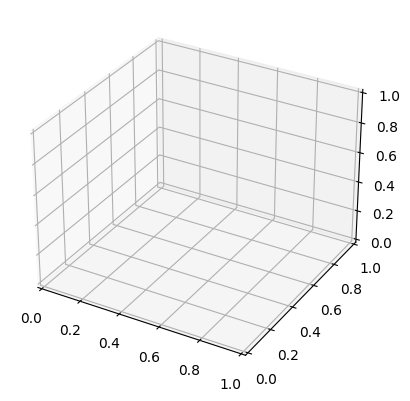

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

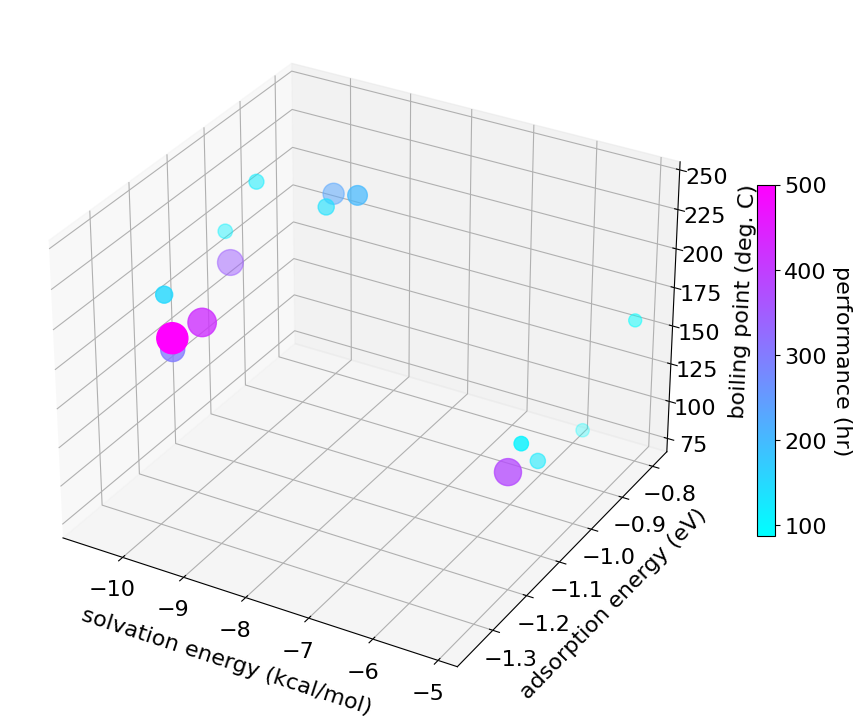

In [7]:
fig = plt.figure(figsize = (9.5, 7.5))
plt.rcParams.update({'font.size': 16})

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = data['solvation energy (kcal/mol)']
ydata = data['adsorption energy (eV)']
zdata = data['boiling point (deg. C)']
cdata = data['Performance (hr)']
sctt = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='cool', s=cdata);


cbar = fig.colorbar(sctt, ax = ax, shrink = 0.5)
ax.set_xlabel('solvation energy (kcal/mol)',labelpad=10)
ax.set_ylabel('adsorption energy (eV)',labelpad=10)
ax.set_zlabel('boiling point (deg. C)',labelpad=10)
cbar.ax.set_ylabel('performance (hr)', rotation=270, labelpad=18)

plt.tight_layout()

plt.savefig('3d_plot.pdf', bbox_inches='tight')

plt.show()

## Linear Regression model

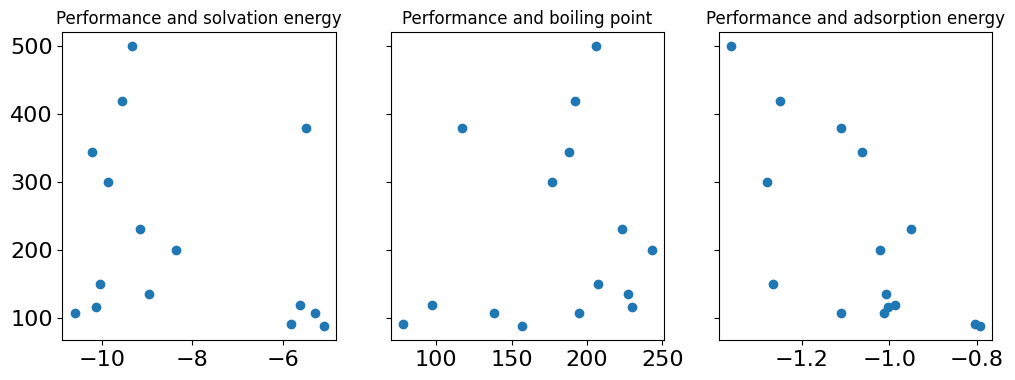

In [8]:
# Use scatter plots to check for linearity

f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize =(12,4))

ax1.scatter(data['solvation energy (kcal/mol)'], data['Performance (hr)'])
ax1.set_title('Performance and solvation energy', fontsize=12)

ax2.scatter(data['boiling point (deg. C)'], data['Performance (hr)'])
ax2.set_title('Performance and boiling point', fontsize=12)

ax3.scatter(data['adsorption energy (eV)'], data['Performance (hr)'])
ax3.set_title('Performance and adsorption energy', fontsize=12)

plt.show()

In [9]:
X = data[['solvation energy (kcal/mol)', 'boiling point (deg. C)', 'adsorption energy (eV)']]

In [10]:
# Let's check for multicollinearity

# VIF method
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [11]:
vif

,VIF,features
0,50.682134,solvation energy (kcal/mol)
1,33.963827,boiling point (deg. C)
2,22.076698,adsorption energy (eV)


In [12]:
X = data[['boiling point (deg. C)', 'adsorption energy (eV)']]

In [13]:
# Let's check for multicollinearity

# VIF method
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [14]:
vif

,VIF,features
0,14.693806,boiling point (deg. C)
1,14.693806,adsorption energy (eV)


### Features and target

In [15]:
X = data[['boiling point (deg. C)', 'adsorption energy (eV)']]
Y = data['Performance (hr)']

### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [17]:
X_scaled = scaler.transform(X)

### Build model

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_scaled, Y)

LinearRegression()

### Test predictions

In [19]:
# Use the forest's predict method on the train data (WARNING: you need to use the test data ideally, but for demo purposes, we simply use the train data)
Y_hat = reg.predict(X_scaled)

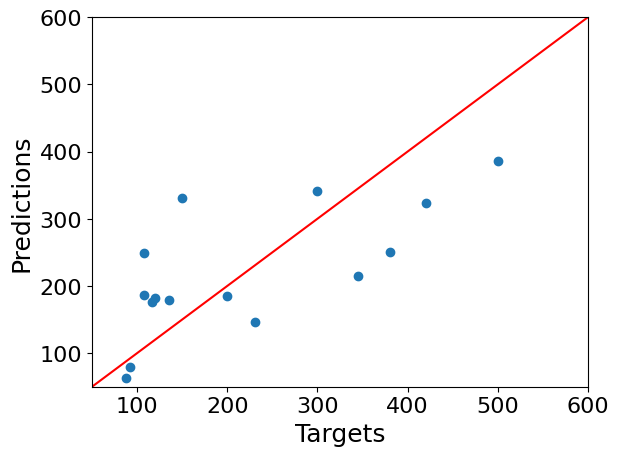

In [20]:
plt.scatter(Y, Y_hat)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.xlim(50,600)
plt.ylim(50,600)

xx = np.arange(50,600,0.1)
yy = xx

plt.plot(xx, yy, '-', color='red')

plt.show()

### Error

In [21]:
from sklearn.metrics import mean_squared_error as mse
print(mse(Y, Y_hat))

8930.293112108217


In [22]:
reg.coef_

array([ -5.81945147, -92.63365823])

## Decision Tree model (A non-linear regression model)

### Build model

In [23]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
dtree = DecisionTreeRegressor(max_depth=3, random_state = 0)

# fit the regressor with X and Y data
dtree.fit(X_scaled, Y)

DecisionTreeRegressor(max_depth=3, random_state=0)

### Test predictions

In [24]:
# Use the forest's predict method on the train data (WARNING: you need to use the test data ideally, but for demo purposes, we simply use the train data)
Y_hat = dtree.predict(X_scaled)

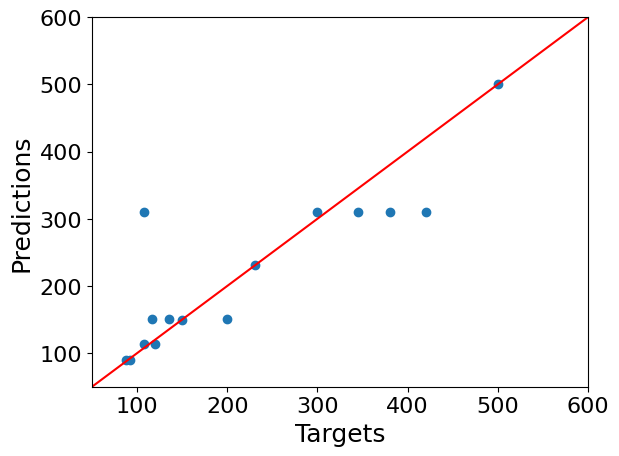

In [25]:
plt.scatter(Y, Y_hat)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.xlim(50,600)
plt.ylim(50,600)

xx = np.arange(50,600,0.1)
yy = xx

plt.plot(xx, yy, '-', color='red')

plt.show()

### Error

In [26]:
from sklearn.metrics import mean_squared_error as mse
print(mse(Y, Y_hat))

4205.857777777778


The decision tree regression model performs better compared to the linear regression model. The MSE for the former is lower than that of the latter.